# Lab 7: Gradient Descent

ER190 | Fall 2018

Duncan Callaway

GSI: Seigi Karasaki

**Your Name**:

**Collaborators**:

In this lab, we will minimize average L1 loss analytically, numerically, and through gradient descent. After understanding the intuition behind gradient descent, we will write a function for L1 loss gradient descent and apply it to a small toy dataset, and then to the tips dataset from the Seaborn library. 

Run the following cells to get started.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore', FutureWarning) # Seaborn triggers warnings in scipy
%matplotlib inline

In [11]:
# Configure nice plotting defaults - (this must be done in a cell separate from %matplotlib call)
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 7)

## Absolute Loss (L1 Loss)

As we went over in lecture, average L1 loss takes in the absolute difference between each point and the prediction ($\theta$). 

It is defined as:
$\begin{aligned}L(\theta, \textbf{y})&= \frac{1}{n} \sum_{i = 1}^{n} |y_i − \theta| \\\end{aligned}$

Absolute loss is known as L1 loss, and we will use the terms interchangeably.

### Question 1.1

Write `abs_loss()` which takes in a predicted y value and an observed y value and calculates the absolute loss (hint: there's a numpy function you'll probably find pretty handy). Then write `avg_absolute_loss()` which takes in a predicted y value and a dataset of observed y values, calculating the absolute loss for each and then finding the average.

In [5]:
def abs_loss(y, y_obs):
    return ...

def avg_absolute_loss(y, data):
    return ...

Run the following cell and check to make sure the computation makes sense.

In [6]:
data = [5, 7, 8, 9]
avg_absolute_loss(8, data)

1.25

---

### Question 1.2

Let's visualize the absolute loss to get a better sense of what's happening. Complete the following cell. We've provided for you `thetas` which serves as an array of guesses for the data. Our objective is to find the average absolute loss for each theta and then plot the loss.

In [ ]:
data = [5, 7, 8, 9]
thetas = np.linspace(0, 10, 200)
loss = ...
... # Plot loss vs. theta here

plt.vlines(data, -3, -2, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend();

Based on the plot, what value of theta minimizes our loss? Is our loss minimized the most by a single theta, or does it seem to be multiple thetas? Why do you think this is the case?

_YOUR ANSWER HERE_

---

### Question 1.3

Let's repeat what we did before but instead choose our thetas to be very far from y. 

But before we plot, a question: how do you think this will affect our loss?

<i>YOUR ANSWER HERE</i>

In [ ]:
data = [5, 7, 8, 9]
thetas = np.linspace(0, 100, 200)
...

plt.vlines(data, 0, 5, colors="r", linewidth=2, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend();

As we can see, thetas far from y result in bad predictions and a bad fit, but only some loss. This is because L1 loss is less sensitive to outliers in comparison to other loss functions.

---

## Analytical Minimization

Now let's try to minimize the average L1 loss analytically.

In order to analytically find the theta that produces the $\hat{\theta}$, the $\theta$ that minimizes the L1 loss, we need to get the partial derivative with respect to $\theta$, that is $\frac{\partial}{\partial \theta} L(\theta, \textbf{y})$, and set it to zero. Unlike for L2 loss, we won't explicitly solve for $\theta$, and you’ll see why as you work through the problem.


Recall that the average L1 loss is defined to be:
$\begin{aligned}L(\theta, \textbf{y})&= \frac{1}{n} \sum_{i = 1}^{n} |y_i − \theta| \\\end{aligned}$

### Question 2.1

Find $\frac{\partial}{\partial \theta} L(\theta, \textbf{y})$ by hand and set it equal to zero. Show your work.

If you're having trouble writing it out in markdown, write it on a piece of paper, take a (legible) photo of it, upload it online, and hyperlink it in.

_YOUR ANSWER HERE_

---

### Question 2.2
Why do we set the derivative equal to zero?

*YOUR ANSWER HERE*

---

### Question 2.3
Based on your calculations in 2.1, you should have obtained $\sum_{y_i < \theta}(1) = \sum_{y_i > \theta}(1)$. What does it say about what $\hat\theta$ should be?

*YOUR ANSWER HERE*

---

## Numerical Minimization

Let’s try out different values for theta, and see how much loss we get for each. Run the next three cells.

In [7]:
avg_absolute_loss(2, data)

5.25

In [8]:
avg_absolute_loss(7, data)

1.25

In [9]:
avg_absolute_loss(7.36, data)

1.25

### Question 3.1
Now, let’s write a function called simple_minimize. All it does is take in a list/array of different theta values, finds the loss corresponding to each theta value, and returns the theta value that results in the least loss.

In [ ]:
def simple_minimize(loss_fun, observations, thetas):
    losses = ... # Hint: You can use a list comprehension, or a couple more lines
    return ... # Hint: return the theta corresponding to the minimum loss

In [13]:
simple_minimize(avg_absolute_loss, data, np.linspace(0, 10, 20))

7.368421052631579

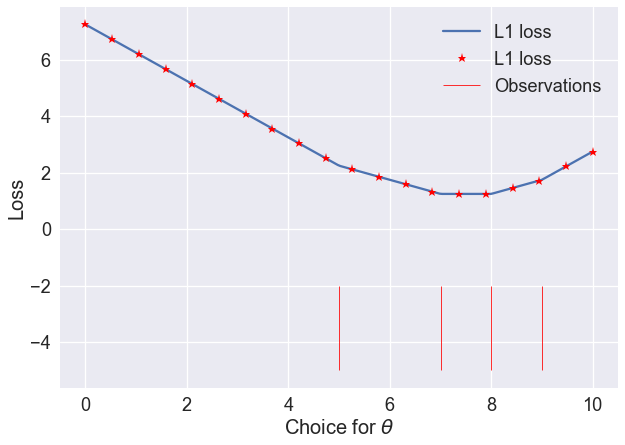

In [12]:
# Just run this cell.
thetas = np.linspace(0, 10, 200)
sparse_thetas = np.linspace(0, 10, 20)

loss = avg_absolute_loss(thetas, data)
sparse_loss = avg_absolute_loss(sparse_thetas, data)

plt.plot(thetas, loss, label = "L1 loss")
plt.plot(sparse_thetas, sparse_loss, 'r*', label = "L1 loss")
plt.vlines(data, -5, -2, colors="r", linewidth=0.8, label="Observations")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend();

This basic approach is incredibly inefficient, and suffers from two major flaws:

1. If the minimum is outside our range of guesses, the answer will be completely wrong.

2. Even if our range of gueseses is correct, if the guesses are too coarse, our answer will be inaccurate.

---

## Gradient Descent

Sometimes, we cannot minimize loss functions analytically, especially when our models get more complex. And as we have seen in the previous section, brute force minimization by just trying out a bunch of different theta values and seeing which one returns the least loss is also incredibly inefficient. 

Instead, we use a technique called gradient descent. You should have read [Ch.11 of the DS100 Textbook](https://www.textbook.ds100.org/ch/11/gradient_descent_define.html), but to remind you of the intuition:

The slope of the tangent line tells us which direction to move $\theta$ in order to decrease the loss. If the slope is negative, we want $\theta$ to move in the positive direction. If the slope is positive, $\theta$ should move in the negative direction. 

And mathematically, our formula is:

$$\theta^{(t+1)} = \theta^{(t)} − \alpha \cdot \frac{\partial}{\partial \theta} L(\theta^{(t)}, \textbf{y})$$

Where $ \theta^{(t)}$ is the current estimate, $ \theta^{(t+1)} $ is the next estimate, and $\alpha$ is the learning rate, or step size.


---

### Question 4.1

Below is the partial derivative (gradient) of L1 loss, as calculated in 2.1. Using this formula, write a function that takes in a theta value and the observed data points, and returns the gradient of L1 loss at that theta. 

$$\begin{aligned}
\frac{\partial}{\partial \theta} L(\theta, \textbf{y})
&= -\frac{1}{n} \sum_{i = 1}^{n} \textbf{sign}(y_i - \theta)\\
&= -\frac{1}{n} \left( \sum_{y_i < \theta}(−1) + \sum_{y_i = \theta}(0) + \sum_{y_i > \theta}(1) \right)\\
\end{aligned}$$

In [ ]:
def grad_abs_loss(theta, dataset):
    num_less = ...
    num_greater = ...
    n = ...
    return ...

---

### Question 4.2

Write a function called minimize, which continues to find a new theta until the thetas converge. You only need to fill in the parts to find the new theta using the mathematical formula for gradient descent:

$$\theta^{(t+1)} = \theta^{(t)} − \alpha \cdot \frac{\partial}{\partial \theta} L(\theta^{(t)}, \textbf{y})$$

In [14]:
def minimize(loss_fn, grad_loss_fn, dataset, alpha=0.2, progress=True):
    '''
    Uses gradient descent to minimize loss_fn. Returns the minimizing value of
    theta_hat.
    '''
    theta = 0
    loss = np.array([])
    while True:
        if progress:
            print(f'theta: {theta:.2f} | loss: {loss_fn(theta, dataset):.2f}')
        loss = ... # Append new loss to loss array
        gradient = ...
        new_theta = ...
        
        if len(loss) - len(np.unique(loss)) >= 10:
            return new_theta
        
        theta = new_theta

Run the following cell to see `minimize()` iteratively print each step in gradient descent and to find the minimizing theta for our small toy dataset.

In [18]:
%%time
theta = minimize(avg_absolute_loss, grad_abs_loss, np.array([12.1, 12.8, 14.9, 16.3, 17.2]))
print(f'Minimizing theta: {theta}')
print()

theta: 0.00 | loss: 14.66
theta: 0.20 | loss: 14.46
theta: 0.40 | loss: 14.26
theta: 0.60 | loss: 14.06
theta: 0.80 | loss: 13.86
theta: 1.00 | loss: 13.66
theta: 1.20 | loss: 13.46
theta: 1.40 | loss: 13.26
theta: 1.60 | loss: 13.06
theta: 1.80 | loss: 12.86
theta: 2.00 | loss: 12.66
theta: 2.20 | loss: 12.46
theta: 2.40 | loss: 12.26
theta: 2.60 | loss: 12.06
theta: 2.80 | loss: 11.86
theta: 3.00 | loss: 11.66
theta: 3.20 | loss: 11.46
theta: 3.40 | loss: 11.26
theta: 3.60 | loss: 11.06
theta: 3.80 | loss: 10.86
theta: 4.00 | loss: 10.66
theta: 4.20 | loss: 10.46
theta: 4.40 | loss: 10.26
theta: 4.60 | loss: 10.06
theta: 4.80 | loss: 9.86
theta: 5.00 | loss: 9.66
theta: 5.20 | loss: 9.46
theta: 5.40 | loss: 9.26
theta: 5.60 | loss: 9.06
theta: 5.80 | loss: 8.86
theta: 6.00 | loss: 8.66
theta: 6.20 | loss: 8.46
theta: 6.40 | loss: 8.26
theta: 6.60 | loss: 8.06
theta: 6.80 | loss: 7.86
theta: 7.00 | loss: 7.66
theta: 7.20 | loss: 7.46
theta: 7.40 | loss: 7.26
theta: 7.60 | loss: 7.06
t

Recall that we learned earlier in the lab that the median is the best minimizer for the absolute loss. Run the following cell to confirm through gradient descent that this is indeed true. If it is true, nothing should print.

In [19]:
assert np.round(theta, 1) == np.median(np.array([12.1, 12.8, 14.9, 16.3, 17.2]))

Moving on from our toy dataset, now we're going to run gradient descent from the tips dataset from the Seaborn library. Run the following cells below to load the dataset and find the minimizing theta through gradient descent.

In [23]:
tips = sns.load_dataset('tips')
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100

In [24]:
%%time
theta = minimize(avg_absolute_loss, grad_abs_loss, tips['pcttip'], progress=False)
print(f'Minimizing theta: {theta}')
print()

Minimizing theta: 15.43278688524595

Wall time: 224 ms


---

### Question 4.3
Use a certain numpy function to find the minimizing theta of the tips dataset analytically. How does it compare to the minimizing theta found through gradient descent?

In [ ]:
... # Replace with your code

## Bibliography
- DS100 - “Gradient Descent” - https://www.textbook.ds100.org/ch/11/gradient_descent_define.html 
- DS100 - “Absolute Loss” - https://www.textbook.ds100.org/ch/10/modeling_abs_huber.html
- DS100 - “Models and Estimation” - http://www.ds100.org/fa18/assets/lectures/lec09/09-Models-and-Estimation-II.html 

---
Notebook developed by: Joshua Asuncion, Rebekah Tang

Data Science Modules: http://data.berkeley.edu/education/modules
